In [1]:
import os
import rasterio
from rasterio.plot import show
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt

In [2]:
band_src=rasterio.open(os.path.join('imagery', 'band1.tif'))

In [3]:
band=band_src.read()

In [4]:
band

array([[[    0,     0,     0, ...,     0,     0,     0],
        [10011,  9988, 10037, ...,  8567,  8594,  8590],
        [ 9965,  9940, 10018, ...,  8551,  8613,  8628],
        ...,
        [ 9181,  9203,  9190, ...,  9823, 10380, 10080],
        [ 9336,  9194,  9183, ...,  9974,  9964,  9918],
        [    0,     0,     0, ...,     0,     0,     0]]], dtype=uint16)

In [5]:
band.shape

(1, 3897, 3831)

In [6]:
X = band.reshape((-1,1))

In [7]:
import time

In [12]:
k_means = cluster.KMeans(n_clusters=7)

In [13]:
%timeit k_means.fit(X, )

11min 45s ± 1min 12s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
set(k_means.labels_)

{0, 1, 2, 3, 4, 5, 6}

In [15]:
X_cluster = k_means.labels_

In [16]:
X_cluster = X_cluster.reshape(band_src.shape)

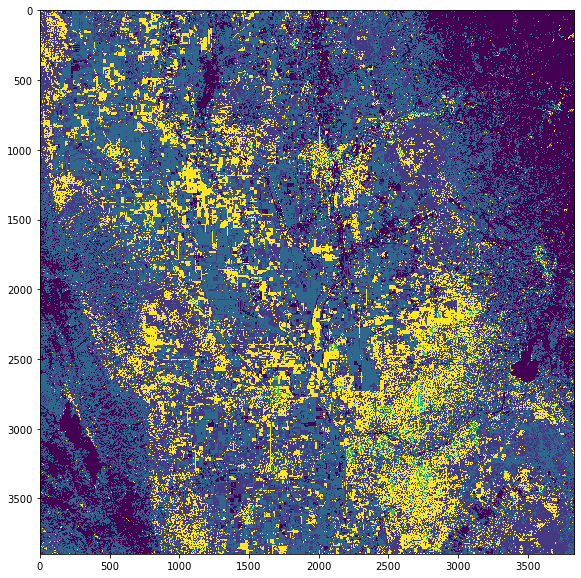

In [19]:
plt.figure(figsize=(10, 10))
plt.imshow(X_cluster, cmap='viridis')
plt.show()

In [3]:
# try all bands
bands=[band for band in os.listdir('imagery') if band.startswith('band')]

In [4]:
# band 8 is panchromatic plus it has 15 meters resolution; band 9 is primarily for detecting clouds while 10 and 11 are 
# thermal and have 100 meters resolution
use_bands=[band for band in bands if int(band.split('band')[1].split('.tif')[0])<8]

In [5]:
use_bands

['band4.tif',
 'band5.tif',
 'band7.tif',
 'band6.tif',
 'band2.tif',
 'band3.tif',
 'band1.tif']

In [6]:
rasters=[]
for band in use_bands:
    rasters.append(rasterio.open(os.path.join('imagery', band)).read().reshape(band_src.shape))

In [7]:
all_bands=np.dstack(rasters)

In [8]:
all_bands.shape

(3897, 3831, 7)

In [9]:
X = all_bands.reshape((-1,1))

In [47]:
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [48]:
# low scalability using this CPU

In [49]:
X_cluster = X_cluster.reshape(band_src.shape)

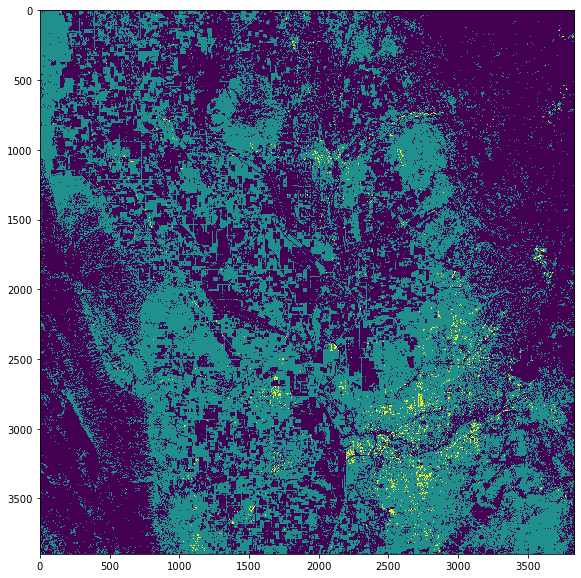

In [50]:
plt.figure(figsize=(10, 10))
plt.imshow(X_cluster)
plt.show()

In [ ]:
db = cluster.DBSCAN(eps=1, min_samples=50, n_jobs=-1)
db.fit(X)

In [ ]:
db.labels_